<a href="https://colab.research.google.com/github/zahraa57/Deep-Learning-CV/blob/main/visual_of_Assignment_3_CIFAR_10_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For CIFAR-10 dataset:
- Add Data augmentation, as in notebook 5.2
- Add TL, as in noteboook 5.3
- Optional: Visualize layers as in notebook 5.4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10 .load_data()

170508288/170498071 [==============================] - 2s 0us/step


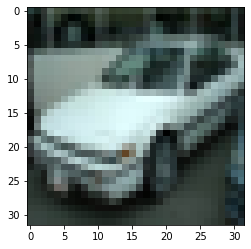

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_images[335])
plt.show()

In [ ]:
x = image.img_to_array(train_images[335])
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

layer_outputs = [layer.output for layer in model.layers[:]]

features = model.predict(x)
model_extractfeatures = Model(inputs=model.input, outputs=layer_outputs)
activations = model_extractfeatures.predict(x)
# fc2_features = fc2_features.reshape((4096,1))
# # np.savetxt('fc2.txt',fc2_features)
# plt.plot(fc2_features)
# plt.show()
first_layer_activation = activations[1]
print(first_layer_activation.shape)


(1, 32, 32, 64)


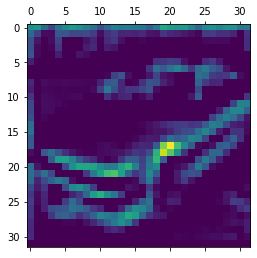

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[ :, :, 3], cmap='viridis')
plt.show()

In [ ]:
first_layer_activation.shape

(32, 32, 64)

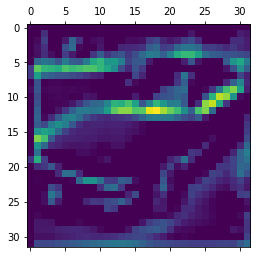

In [ ]:
plt.matshow(first_layer_activation[ :, :, 30], cmap='viridis')
plt.show()

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
layer_names = []
for layer in model.layers[:]:
    layer_names.append(layer.name)
layer_names

['input_6',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_pool']

['input_9', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool']
1


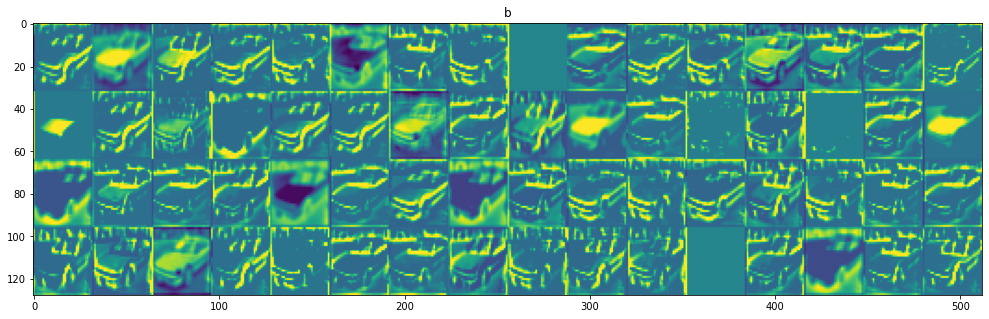

In [ ]:
import keras
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:]:
    layer_names.append(layer.name)
print(layer_names)
images_per_row = 16
# Now let's display our feature maps
i=0
for layer_name, layer_activation in zip(layer_names[1], activations[1]):
    i=i+1
    print(i)
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[ :, :, col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=( scale * display_grid.shape[1]+1,
                          scale * display_grid.shape[0]+1 ))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

['input_9', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool']
1


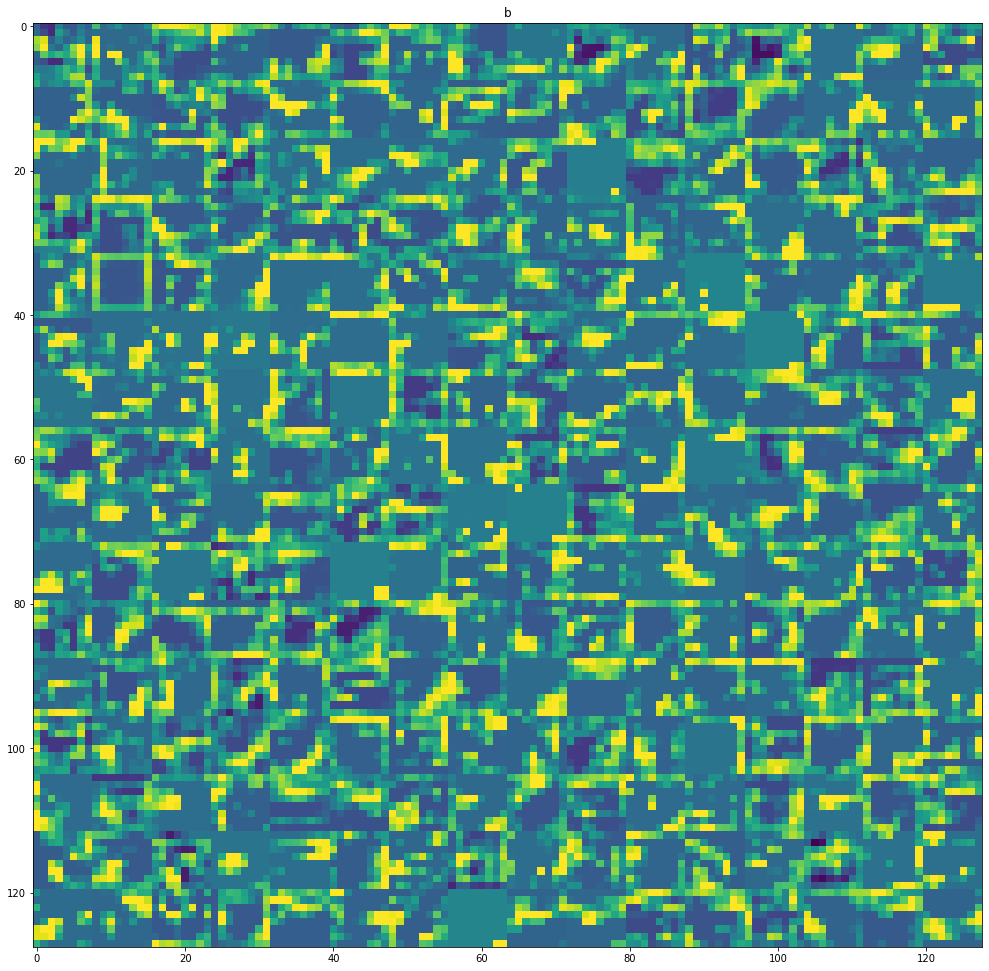

In [ ]:
import keras
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:]:
    layer_names.append(layer.name)
print(layer_names)
images_per_row = 16
# Now let's display our feature maps
i=0
for layer_name, layer_activation in zip(layer_names[8], activations[8]):
    i=i+1
    print(i)
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[ :, :, col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=( scale * display_grid.shape[1]+1,
                          scale * display_grid.shape[0]+1 ))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()